In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import csv

Drop some unneccessary columns and stations from the data to reduce file size

In [128]:
"""df=pd.read_csv("data/dublinbikes.csv")
df_james=df.loc[(df["STATION ID"]==80)] #James hospital
df_portobello=df.loc[(df["STATION ID"]==43)] # portobello

df_james.to_csv('data/dublinbikes_james_hospital.csv',index=False)
df_portobello.to_csv('data/dublinbikes_portobello.csv',index=False)
"""

'df=pd.read_csv("data/dublinbikes.csv")\ndf_james=df.loc[(df["STATION ID"]==80)] #James hospital\ndf_portobello=df.loc[(df["STATION ID"]==43)] # portobello\n\ndf_james.to_csv(\'data/dublinbikes_james_hospital.csv\',index=False)\ndf_portobello.to_csv(\'data/dublinbikes_portobello.csv\',index=False)\n'

In [129]:
df_hospital=pd.read_csv("raw_data/dublinbikes_james_hospital.csv")
df_portobello=pd.read_csv("raw_data/dublinbikes_portobello.csv")

In [130]:
def process_dataframe(df):

    df.drop(columns=["ADDRESS","LATITUDE","LONGITUDE","LAST UPDATED","NAME","STATION ID","AVAILABLE BIKE STANDS","STATUS"],axis=1,inplace=True)
    df["TIME"]=pd.to_datetime(df["TIME"])
    
    df.sort_values(by=['TIME'],inplace=True)
    df["GAP AMOUNT"]=df["TIME"].diff().dt.seconds/60

    return df

In [131]:
df_hospital=process_dataframe(df_hospital)
df_portobello=process_dataframe(df_portobello)

Lets check for gaps in the data

In [132]:
df_hospital.loc[df_hospital["GAP AMOUNT"]>6]

,TIME,BIKE STANDS,AVAILABLE BIKES,GAP AMOUNT
167,2020-01-03 00:05:02,40,23,230.000000
475,2020-01-05 06:25:02,40,27,285.000000
690,2020-01-13 00:05:27,40,15,1430.416667
1176,2020-01-23 00:05:30,40,19,455.466667
1510,2020-01-25 07:25:02,40,14,215.000000
1678,2020-01-27 13:40:05,40,16,980.050000
11012,2020-02-28 23:32:09,40,19,7.116667
11017,2020-02-28 23:57:09,40,21,7.116667
15687,2020-03-16 08:15:02,40,23,194.983333
15689,2020-03-16 08:35:02,40,19,15.000000


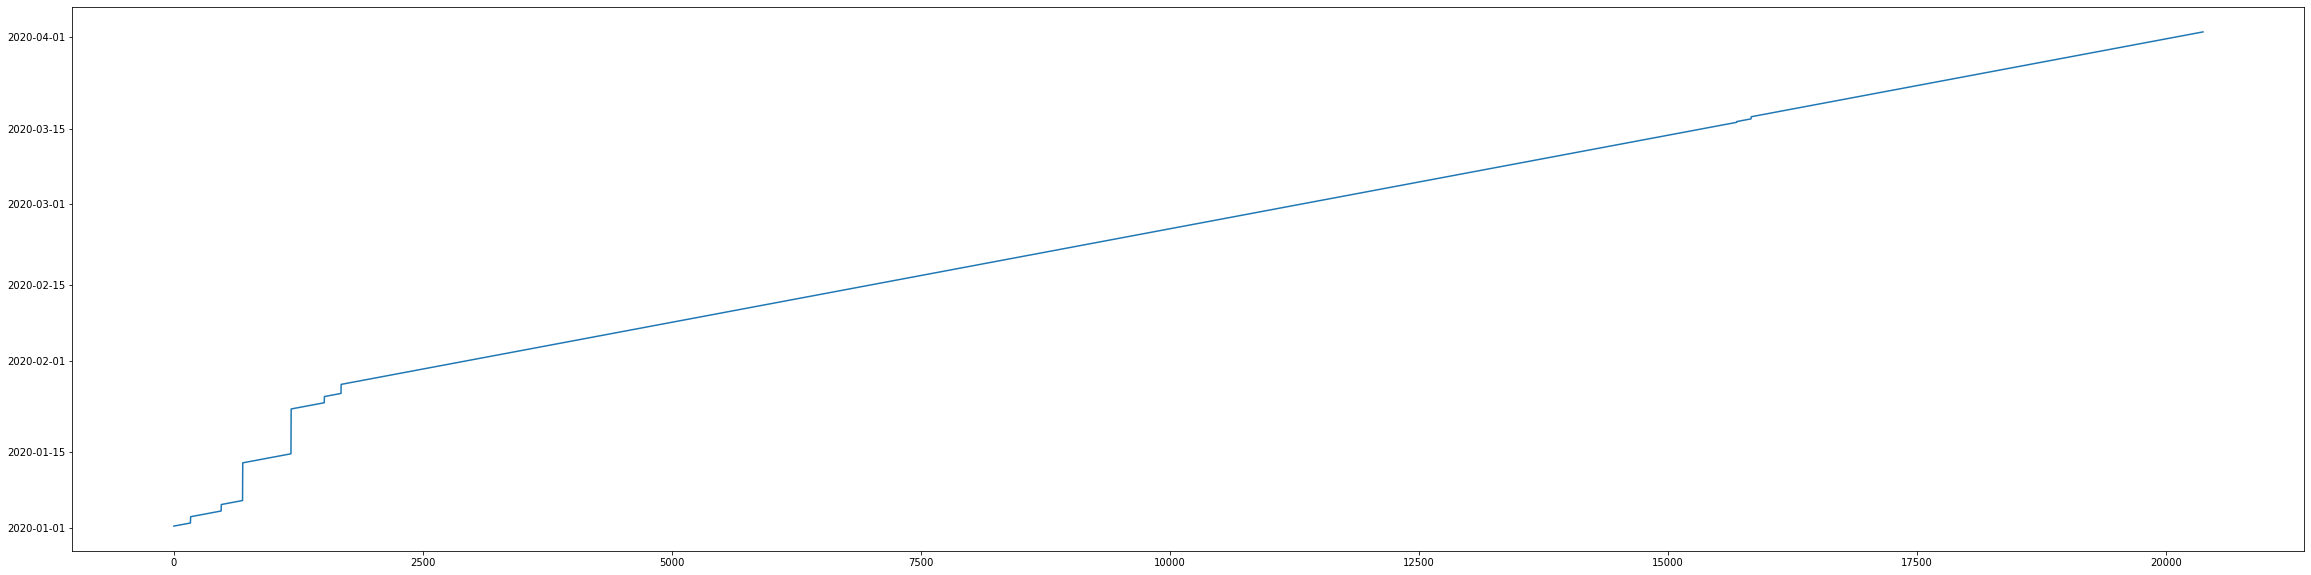

In [133]:


fig,ax = plt.subplots(1, 1, figsize=(40, 10))
ax.plot(range(0,len(df_hospital)),df_hospital["TIME"])
plt.show()

In [134]:
def plot_data(df):
    fig, ax = plt.subplots(1, 1, figsize=(40, 10))
    ax.plot(df["TIME"],df["AVAILABLE BIKES"])
    plt.show()

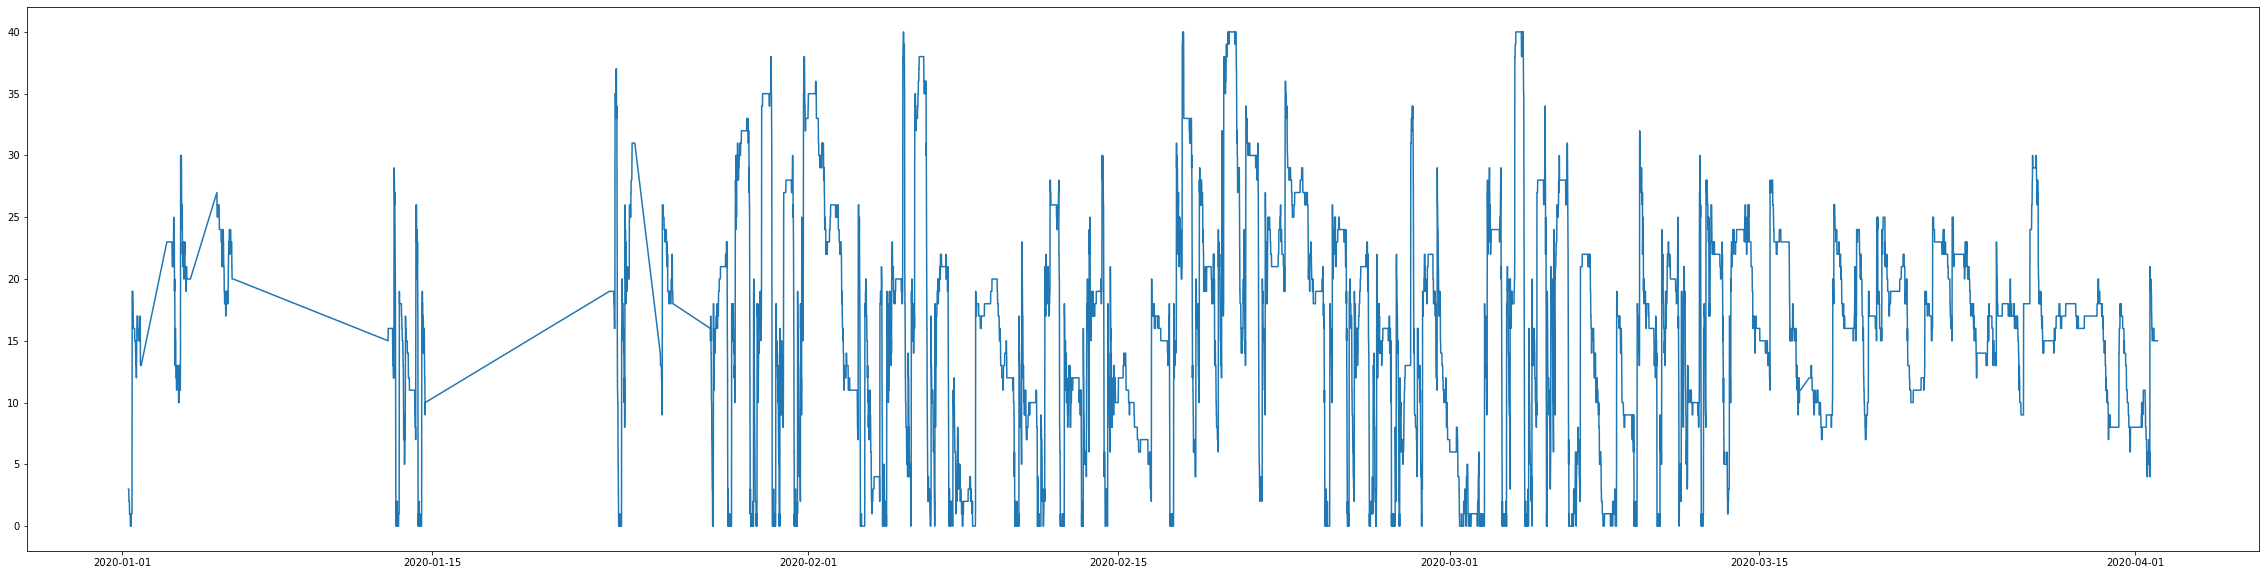

In [135]:
plot_data(df_hospital)


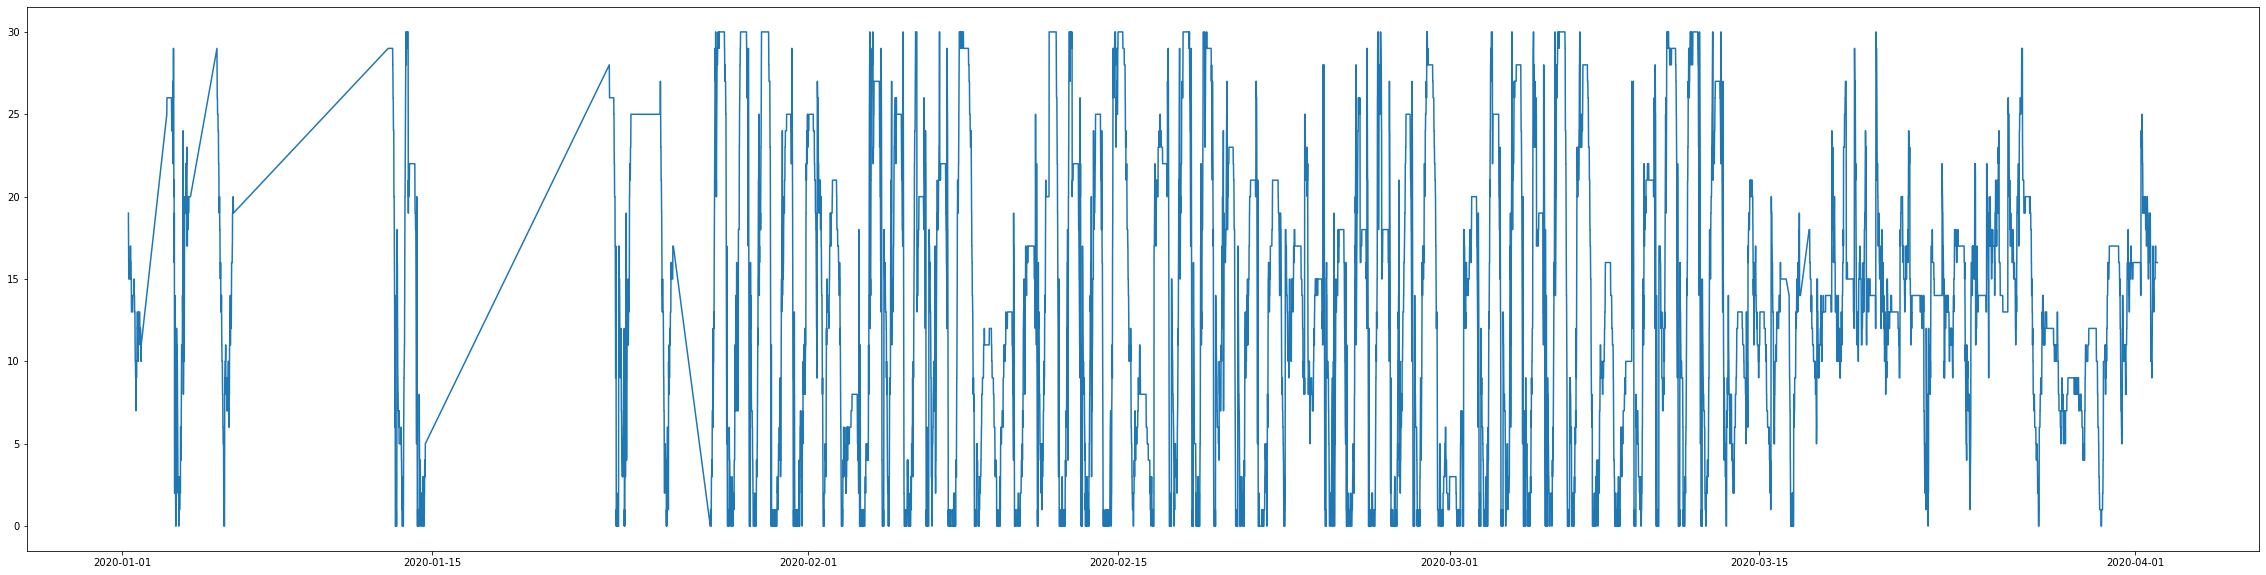

In [136]:
plot_data(df_portobello)

<h1> Gaps and Noise in the Data<h1>

Looking at the gaps in the data, all data before 27th of January have gaps too big to impute, so lets drop this data.

Due to COVID-19 after the 15th of March our data seasonality changes drastically.
We have two options here:
<ol>
<li>Drop the data during COVID</li>
<li>Add a feature to represent when COVID started</li>
</ol>

For now I'm just going to drop the data, I may add in a feature later...

In [137]:
def drop_data(df):
    df= df.loc[df["TIME"]>datetime.date(2020,1,28)]
    return df.loc[df["TIME"]<datetime.date(2020,3,13)]

In [138]:
df_hospital=drop_data(df_hospital)
df_portobello=drop_data(df_portobello)


/tmp/ipykernel_568689/877406996.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  df= df.loc[df["TIME"]>datetime.date(2020,1,28)]
/tmp/ipykernel_568689/877406996.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  return df.loc[df["TIME"]<datetime.date(2020,3,13)]


In [139]:
df_hospital.loc[df_hospital["GAP AMOUNT"]>6]

,TIME,BIKE STANDS,AVAILABLE BIKES,GAP AMOUNT
11012,2020-02-28 23:32:09,40,19,7.116667
11017,2020-02-28 23:57:09,40,21,7.116667


Looks like we have a couple of gaps longer than others, but nothing big enough to impute

Lets Normalise our data before we start feature engineering

In [140]:
def drop_column(df:pd.DataFrame, column:str):
    df.drop(columns=[column],axis=1, inplace=True)
    return df

In [141]:
df_hospital=drop_column(df_hospital,"GAP AMOUNT")
df_portobello=drop_column(df_portobello,"GAP AMOUNT")

In [142]:
df_hospital.to_csv('processed_data/dublinbikes_james_hospital.csv',index=False)
df_portobello.to_csv('processed_data/dublinbikes_portobello.csv',index=False)